In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data, io
from skimage.filters import gaussian
from skimage.segmentation import active_contour

%matplotlib inline

import os

In [54]:
marchantia = io.imread('./colon_seg/results/marchantia/marchantia17.png')
#marchantia = io.imread('./marchantia_images/g2_t017_c001.png')
marchantia = rgb2gray(marchantia)

s = np.linspace(0, 2*np.pi, 500)
x = 512 + 512*np.cos(s)
y = 512 + 512*np.sin(s)
init = np.array([x, y]).T

snake = active_contour(gaussian(marchantia,3),
                       init, alpha=0.015, beta=.001, gamma=0.001, w_edge = 4)

[0, 1024, 1024, 0]

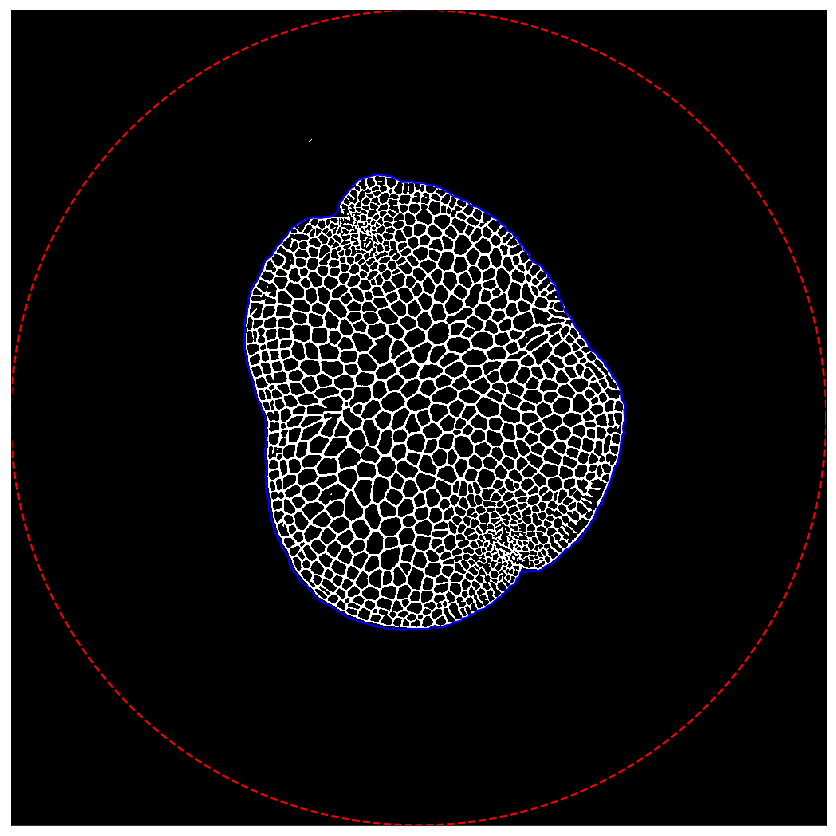

In [55]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(marchantia, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=2)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=2)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, marchantia.shape[1], marchantia.shape[0], 0])